### **Library Importing**

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn

### **Upload CSV file**

In [3]:
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)\r\n0001,Male,19,15,39\r\n0002,Male,21,15,81\r\n0003,Female,20,16,6\r\n0004,Female,23,16,77\r\n0005,Female,31,17,40\r\n0006,Female,22,17,76\r\n0007,Female,35,18,6\r\n0008,Female,23,18,94\r\n0009,Male,64,19,3\r\n0010,Female,30,19,72\r\n0011,Male,67,19,14\r\n0012,Female,35,19,99\r\n0013,Female,58,20,15\r\n0014,Female,24,20,77\r\n0015,Male,37,20,13\r\n0016,Male,22,20,79\r\n0017,Female,35,21,35\r\n0018,Male,20,21,66\r\n0019,Male,52,23,29\r\n0020,Female,35,23,98\r\n0021,Male,35,24,35\r\n0022,Male,25,24,73\r\n0023,Female,46,25,5\r\n0024,Male,31,25,73\r\n0025,Female,54,28,14\r\n0026,Male,29,28,82\r\n0027,Female,45,28,32\r\n0028,Male,35,28,61\r\n0029,Female,40,29,31\r\n0030,Female,23,29,87\r\n0031,Male,60,30,4\r\n0032,Female,21,30,73\r\n0033,Male,53,33,4\r\n0034,Male,18,33,92\r\n0035,Female,49,33,14\r\n0036,Female,21,33,81\r\n0037,Female,42,34,17\r\n0038,Female,30,34,73\r\n0039,Female,36,37,26\r\n0040,Female

### **Dataset Loading**

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')



In [5]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### **Check for null entry**

In [6]:
dataset.isnull().values.any()

False

### **Rename the Columns**

In [8]:
dataset.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)
dataset

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### **Dataset Description**

In [9]:
dataset.describe()

,CustomerID,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### **Display Histogram**

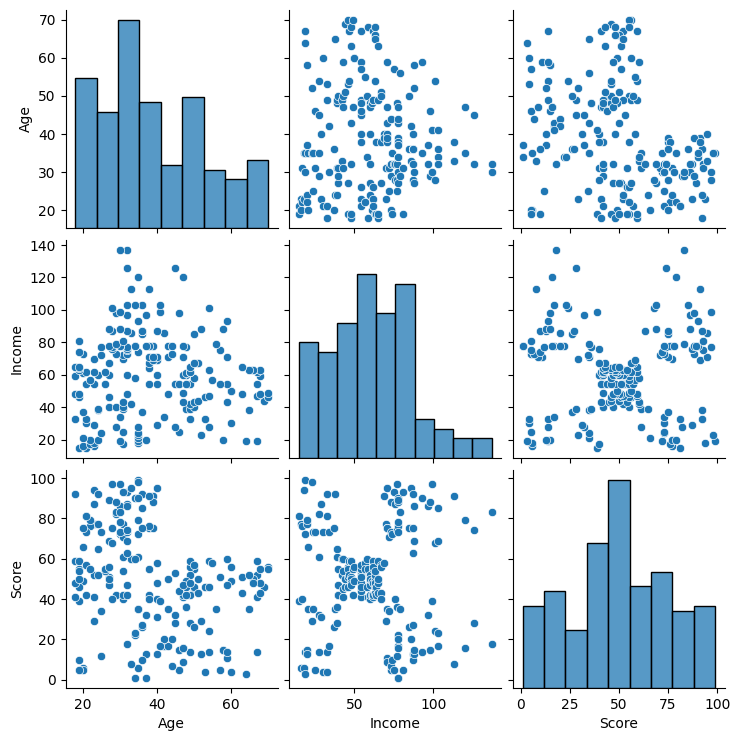

In [10]:
seaborn.pairplot(dataset[['Age','Income','Score']])

### **Applying K-Means for Score and Income**

In [11]:
import sklearn.cluster as cluster

kmeans= cluster.KMeans(n_clusters=5)

kmeans = kmeans.fit(dataset[['Score','Income']])

kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [49.51851852, 55.2962963 ]])

### **Adding New Cluster Column**

In [12]:
dataset['Income_Cluster'] = kmeans.labels_

dataset

,CustomerID,Genre,Age,Income,Score,Income_Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


### **Count the number of elements in a column**

In [13]:
dataset['Income_Cluster'].value_counts()

4    81
0    39
2    35
1    23
3    22
Name: Income_Cluster, dtype: int64

### **Plotting the clusters**

<Axes: xlabel='Income', ylabel='Score'>

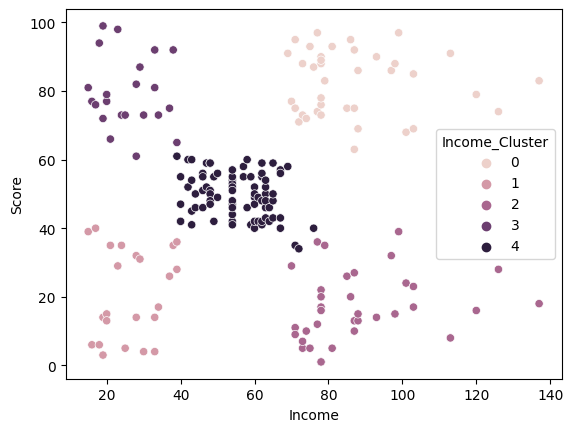

In [15]:
seaborn.scatterplot(x='Income',y='Score',hue='Income_Cluster',data=dataset)

### **Applying K-Means for Score and Age**

In [32]:
kmeans= cluster.KMeans(n_clusters=2)

kmeans = kmeans.fit(dataset[['Age','Score']])

kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[46.16521739, 32.88695652],
       [28.95294118, 73.62352941]])

### **Adding New Cluster Column**

In [33]:
dataset['Age_Cluster'] = kmeans.labels_

dataset

,CustomerID,Genre,Age,Income,Score,Income_Cluster,Age_Cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,3,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,3,1
4,5,Female,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,1
196,197,Female,45,126,28,2,0
197,198,Male,32,126,74,0,1
198,199,Male,32,137,18,2,0


### **Count the number of elements in a column**

In [34]:
dataset['Age_Cluster'].value_counts()

0    115
1     85
Name: Age_Cluster, dtype: int64

### **Plotting the clusters**

<Axes: xlabel='Age', ylabel='Score'>

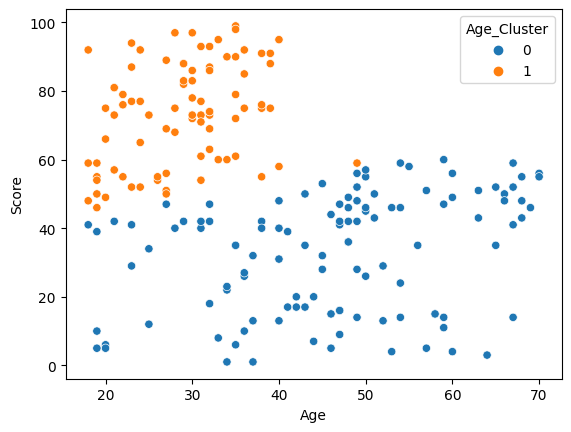

In [37]:
seaborn.scatterplot(x='Age',y='Score',hue='Age_Cluster',data=dataset)